In [31]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.extensions import Initialize
from qiskit.quantum_info import Statevector

import matplotlib.pyplot as plt
import numpy as np


# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

let's define a simple quantum circuit with two qubits. We will apply Hadamard gates to both qubits and then entangle them with a controlled-NOT (CNOT) gate:

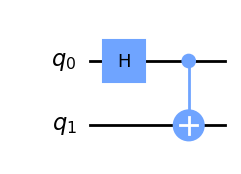

In [32]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw('mpl')

In [33]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
statevector = result.get_statevector(qc)  # Get the statevector as a Statevector object


In [34]:
# Convert the statevector to a numpy array to avoid the deprecation warning
statevector_array = np.asarray(statevector)

# Print the MPS representation for each qubit site
for i, amplitude in enumerate(statevector_array):
    print(f"Site {i}: {amplitude}")

Site 0: (0.7071067811865476+0j)
Site 1: 0j
Site 2: 0j
Site 3: (0.7071067811865475+0j)


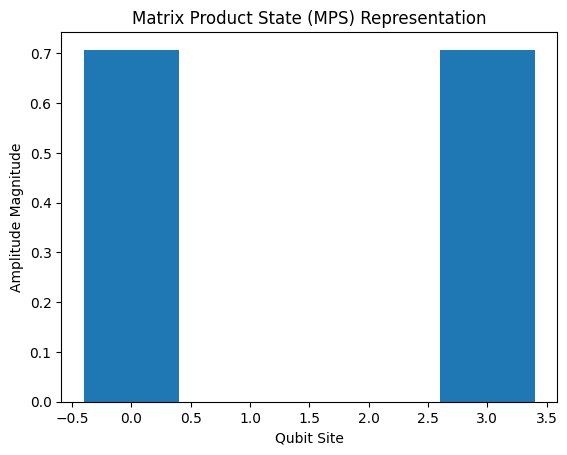

In [36]:
# Plot the MPS representation
num_sites = len(statevector_array)
plt.bar(range(num_sites), np.abs(statevector_array), align='center')
plt.xlabel('Qubit Site')
plt.ylabel('Amplitude Magnitude')
plt.title('Matrix Product State (MPS) Representation')
plt.show()